In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

plt.style.use("ggplot")

In [2]:
from IPython.display import HTML

video_html = '''
<blockquote class="tiktok-embed" cite="https://www.tiktok.com/@cristian875_5/video/7215264159737384198" data-video-id="7215264159737384198" style="max-width: 605px;min-width: 325px;">
    <section>
        <a target="_blank" title="@cristian875_5" href="https://www.tiktok.com/@cristian875_5?refer=embed">@cristian875_5</a>
        Ese seria el plan B 🤣
        <a title="humor" target="_blank" href="https://www.tiktok.com/tag/humor?refer=embed">#humor</a>
        <a title="parati" target="_blank" href="https://www.tiktok.com/tag/parati?refer=embed">#parati</a>
        <a title="ingeniero" target="_blank" href="https://www.tiktok.com/tag/ingeniero?refer=embed">#ingeniero</a>
        <a title="fyp" target="_blank" href="https://www.tiktok.com/tag/fyp?refer=embed">#fyp</a>
        <a target="_blank" title="♬ sonido original - gecelerin_fırtınası" href="https://www.tiktok.com/music/sonido-original-7213475448230677253?refer=embed">♬ sonido original - gecelerin_fırtınası</a>
    </section>
</blockquote>
<script async src="https://www.tiktok.com/embed.js"></script>
'''

display(HTML(video_html))


# Import the Data

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Many missing data in these columns.

In [7]:
train.isna().sum().sort_values(ascending = False)[:6].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [8]:
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)

# Continuous Variables.

In [9]:
continuos_variable = train.columns[train.nunique() > 20]
continuos_variable = train[continuos_variable]

In [10]:
continuos_variable.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
1stFlrSF,1460.0,1162.626712,386.587738,334.0,882.00,1087.0,1391.25,4692.0


# Categorical Data

In [11]:
Categorical = train.columns[train.nunique() <= 15]
Categorical = train[Categorical]

In [12]:
Categorical.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.0,190.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.0,9.0
BsmtFullBath,1460.0,0.425342,0.518911,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,1460.0,0.057534,0.238753,0.0,0.0,0.0,0.0,2.0
FullBath,1460.0,1.565068,0.550916,0.0,1.0,2.0,2.0,3.0
HalfBath,1460.0,0.382877,0.502885,0.0,0.0,0.0,1.0,2.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.0,3.0,3.0,8.0
KitchenAbvGr,1460.0,1.046575,0.220338,0.0,1.0,1.0,1.0,3.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.0,6.0,7.0,14.0


# Exploratory Data Analysis

/tmp/ipykernel_20/3861274507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr().nlargest(20, "SalePrice")


<Axes: >

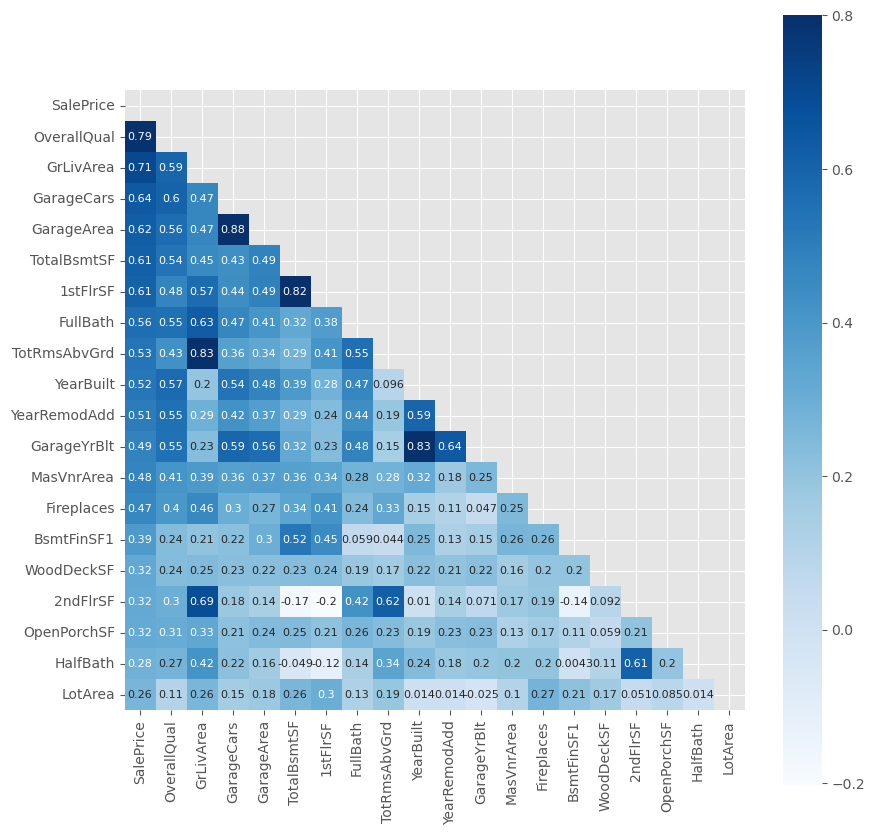

In [13]:
corrmat = train.corr().nlargest(20, "SalePrice")
corrmat = corrmat.T.sort_values("SalePrice", ascending = False)[:20]
mask = np.triu(np.ones_like(corrmat))
plt.figure(figsize = (10, 10))
sns.heatmap(data = corrmat, mask = mask, annot = True, square = True, cmap = "Blues", vmax = .8, annot_kws = {"fontsize" : 8})

In [14]:
categoricals = train.columns[train.nunique() <= 10]

for column in categoricals:
    print(f"Feature name: {column}\n")
    print(train[column].value_counts())
    print("")
    print("="*20)

Feature name: MSZoning

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Feature name: Street

Pave    1454
Grvl       6
Name: Street, dtype: int64

Feature name: LotShape

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Feature name: LandContour

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Feature name: Utilities

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Feature name: LotConfig

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Feature name: LandSlope

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Feature name: Condition1

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Feature name: Condition2

Norm      1445
Feedr        6
Artery       2
RRNn  

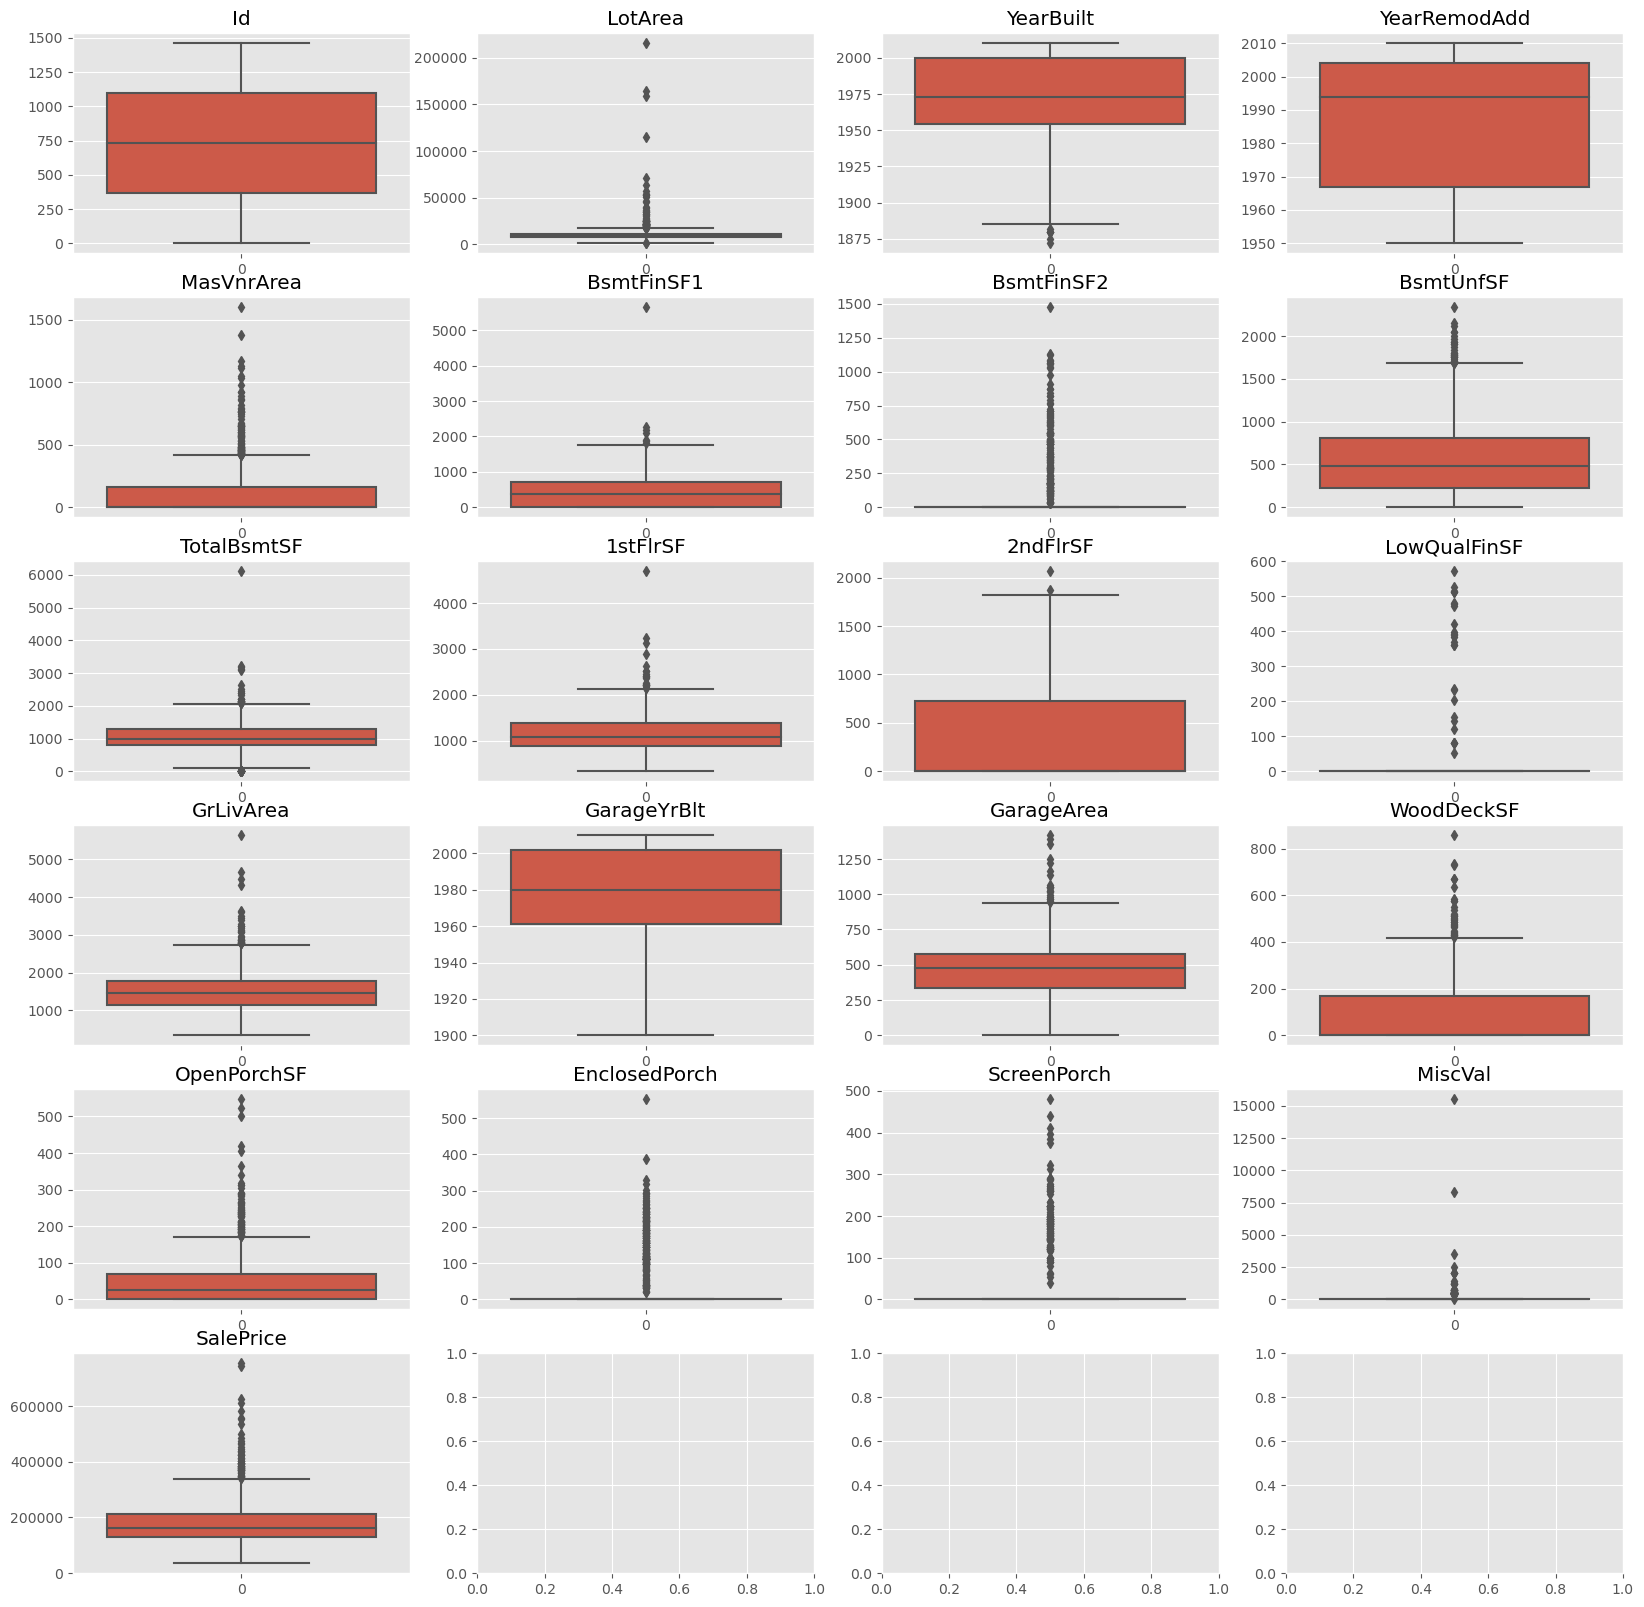

In [15]:
cols = train.columns[train.nunique() > 20]
cols = cols.drop("Neighborhood")

fig, axes = plt.subplots(6, 4, figsize = (20, 20))

for i, name in enumerate(cols):
    
    r, c = i//4, i%4
    sns.boxplot(data = train[name], ax = axes[r, c])
    axes[r, c].set_title(name)

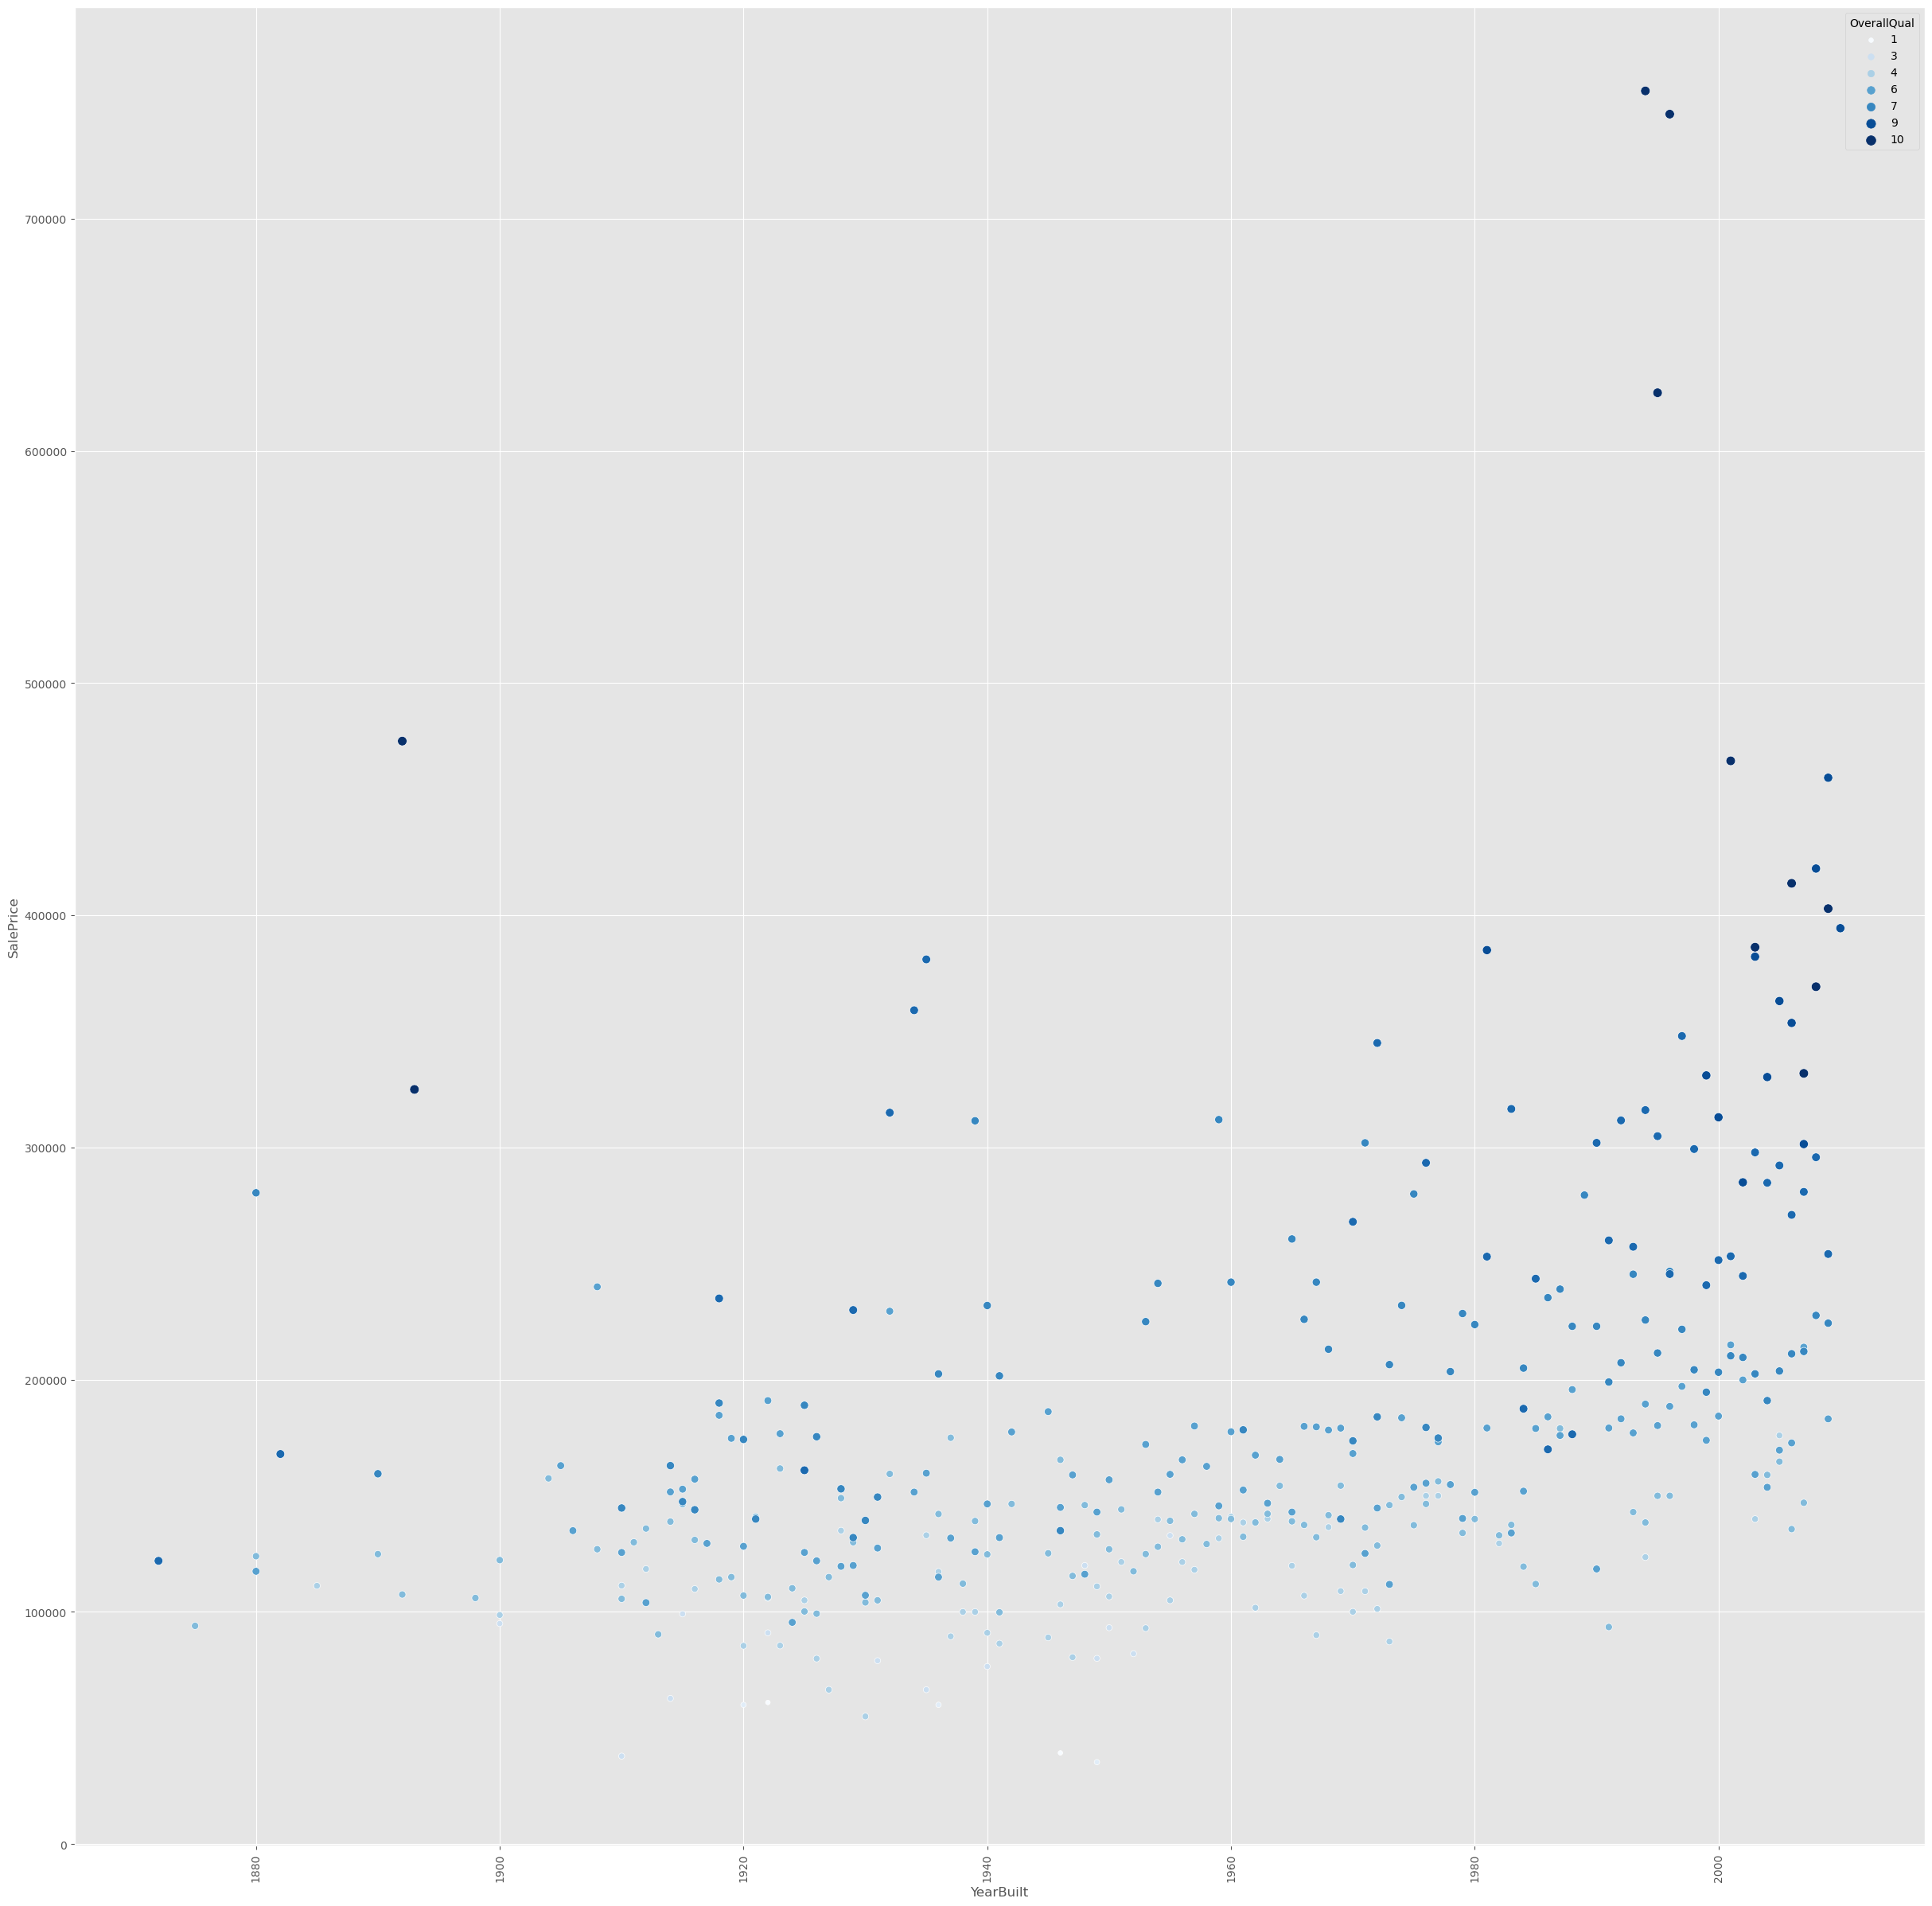

In [16]:
yb = train.groupby(["YearBuilt" ,"OverallQual"]).agg({"SalePrice" : "mean"})
yb.reset_index(inplace = True)
plt.figure(figsize = (30, 30))
sns.scatterplot(data = yb, x = "YearBuilt", y = "SalePrice", hue = "OverallQual", size="OverallQual", palette = "Blues")
plt.xticks(rotation = 90)

plt.show()

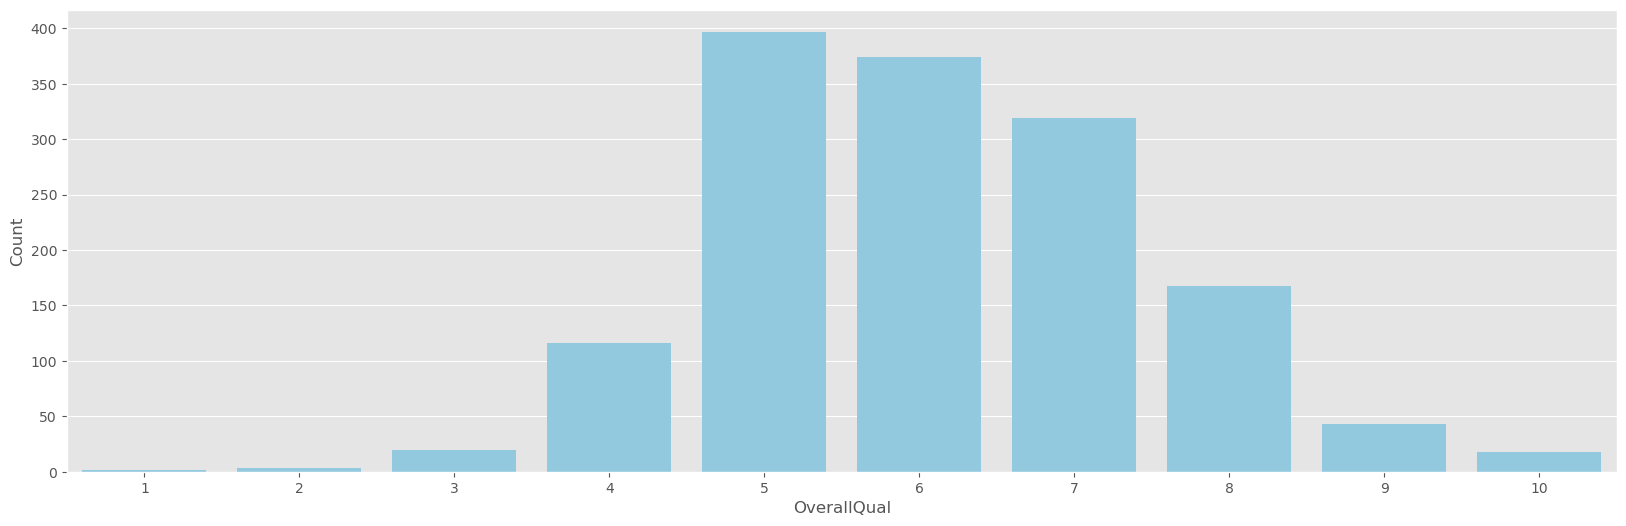

In [17]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train, x="OverallQual", color = "skyblue")
plt.xlabel("OverallQual")
plt.ylabel("Count")

plt.show()

<Axes: xlabel='SalePrice', ylabel='Count'>

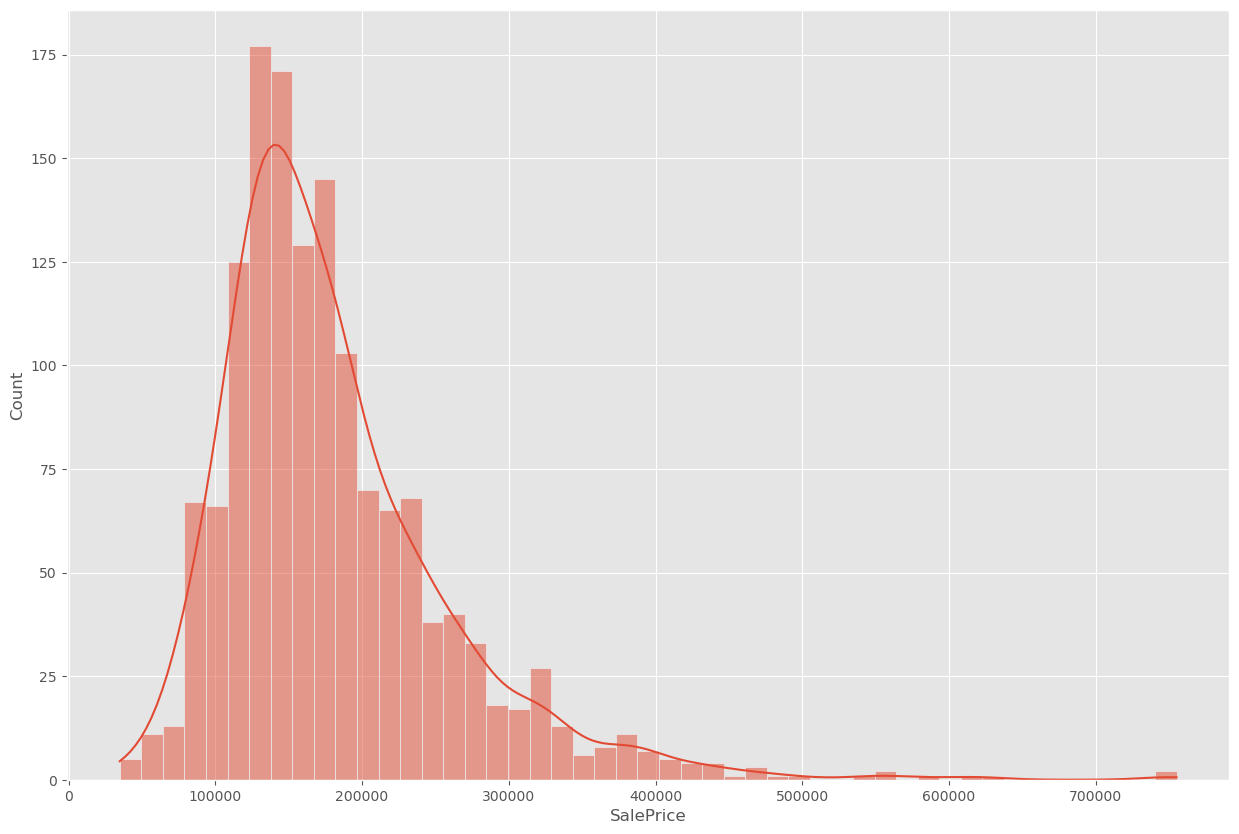

In [18]:
plt.figure(figsize = (15, 10))
sns.histplot(train.SalePrice, kde = True)

([<matplotlib.patches.Wedge at 0x7b5865b15f60>,
 [Text(1.1149699882557937, 0.2816769875031948, '0-100k'),
  Text(0.8338965902590888, 0.7919068611612512, '100k-200k'),
  Text(-0.14315112302962574, 1.1410555446494954, '200k-300k'),
  Text(-0.4343641818355259, -1.064813484859369, '300k+')],
 [Text(0.5817234721334577, 0.146961906523406, '7.9%'),
  Text(0.4350764818743072, 0.41316879712760934, '8.4%'),
  Text(-0.07468754245023952, 0.5953333276432151, '21.4%'),
  Text(-0.2266247905228831, -0.5555548616657578, '62.3%')])

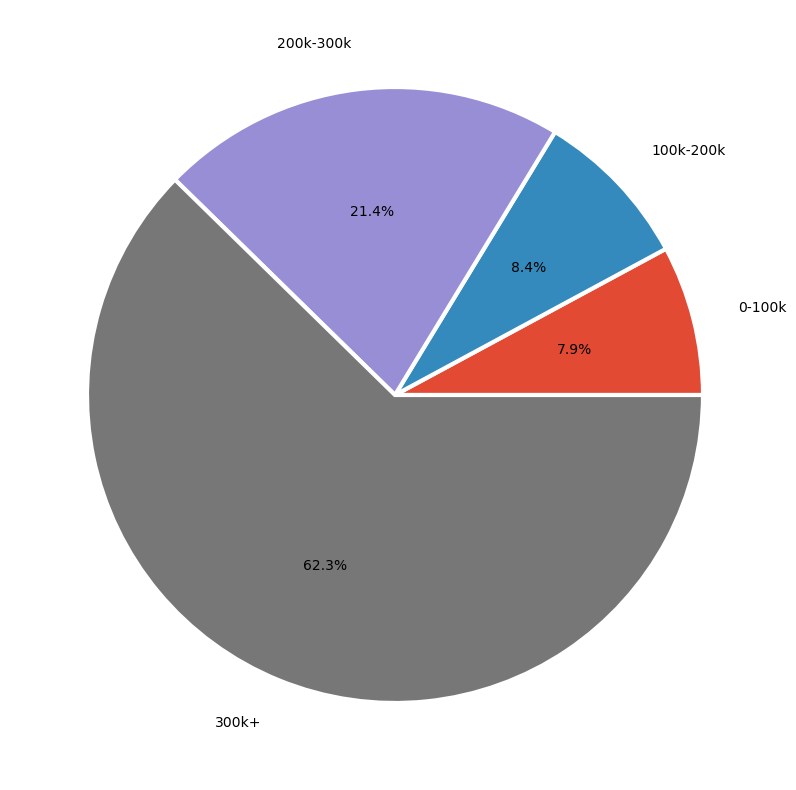

In [19]:
plt.figure(figsize=(15, 10))
bins = [0, 100000, 200000,300000, train['SalePrice'].max()]
labels = ['0-100k', '100k-200k','200k-300k', '300k+']
train['price_range'] = pd.cut(train['SalePrice'], bins=bins, labels=labels)

plt.pie(

train['price_range'].value_counts().sort_values(),
autopct='%.1f%%',
labels=labels,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)

In [20]:
train = train[train["SalePrice"] < 350000]
train.shape

(1404, 76)

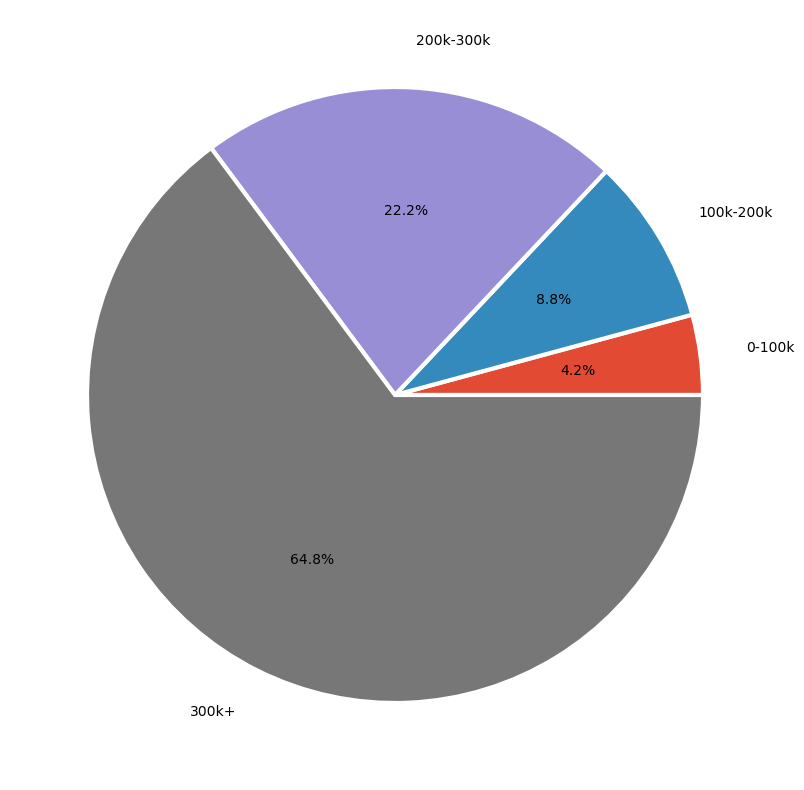

In [21]:
plt.figure(figsize=(15, 10))
bins = [0, 100000, 200000, 300000, train['SalePrice'].max()]
labels = ['0-100k', '100k-200k', '200k-300k', '300k+']
train['price_range'] = pd.cut(train['SalePrice'], bins=bins, labels=labels)

plt.pie(
    train['price_range'].value_counts().sort_values(),
    autopct='%.1f%%',
    labels=labels,
    labeldistance=1.15,
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    textprops={'color': 'black'} 
)

plt.show()


# Mean SalePrice by Features

In [22]:
def plot_mean_saleprice(column_name):
    groupby_column = train.groupby(column_name).agg({"SalePrice": "mean"})

    plt.figure(figsize=(20, 8))
    sns.barplot(data=groupby_column, x=groupby_column.index, y="SalePrice", color='blue')

    max_saleprice_category = groupby_column['SalePrice'].idxmax()

    index = groupby_column.index.get_loc(max_saleprice_category)
    plt.gca().patches[index].set_facecolor('red')

    plt.xlabel(column_name)
    plt.ylabel('SalePrice')
    plt.title(f'Mean SalePrice by {column_name}')
    if column_name == "YearBuilt":
        plt.xticks(rotation=90)
    

    plt.show()


<Figure size 1000x600 with 0 Axes>

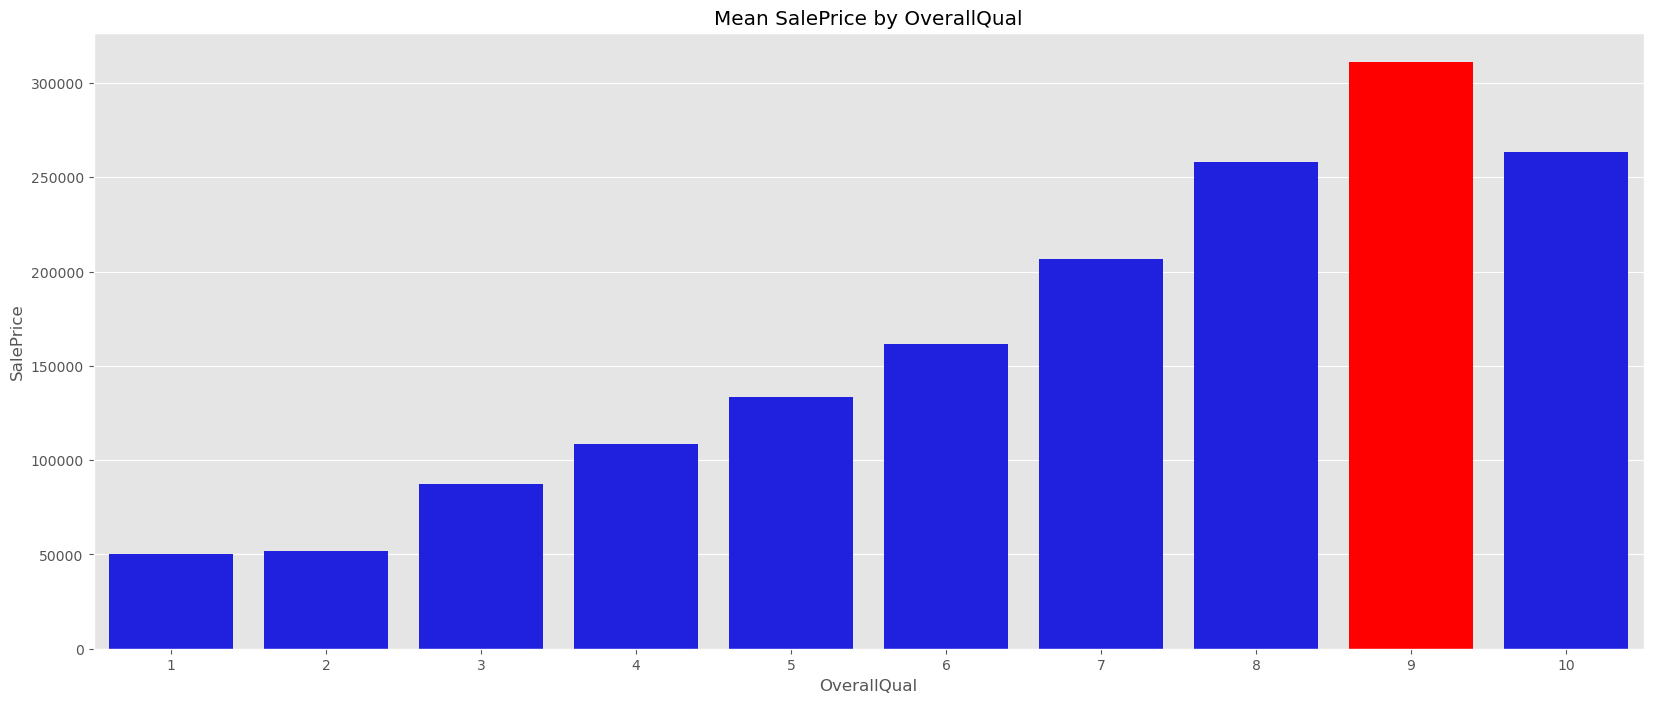

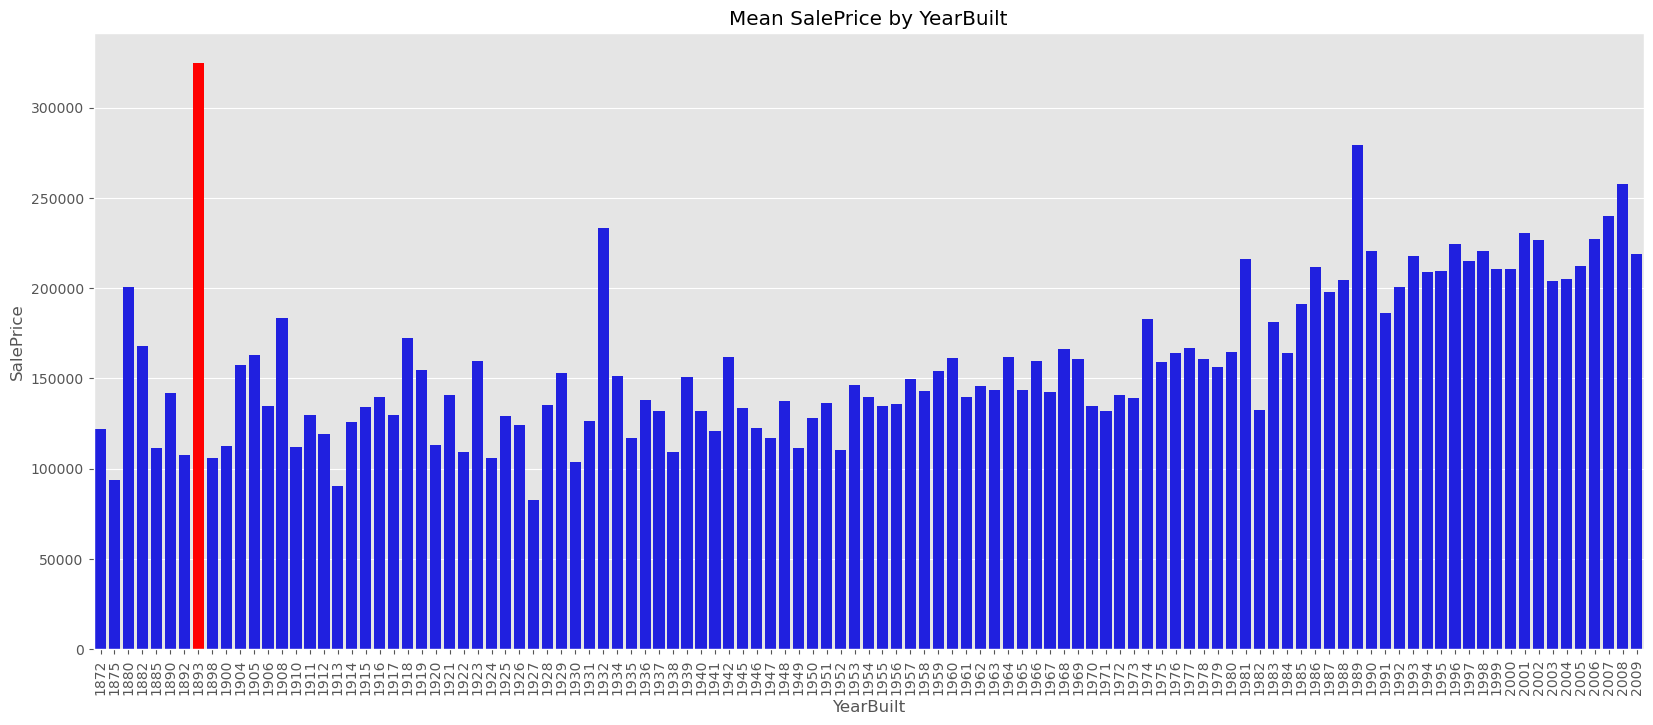

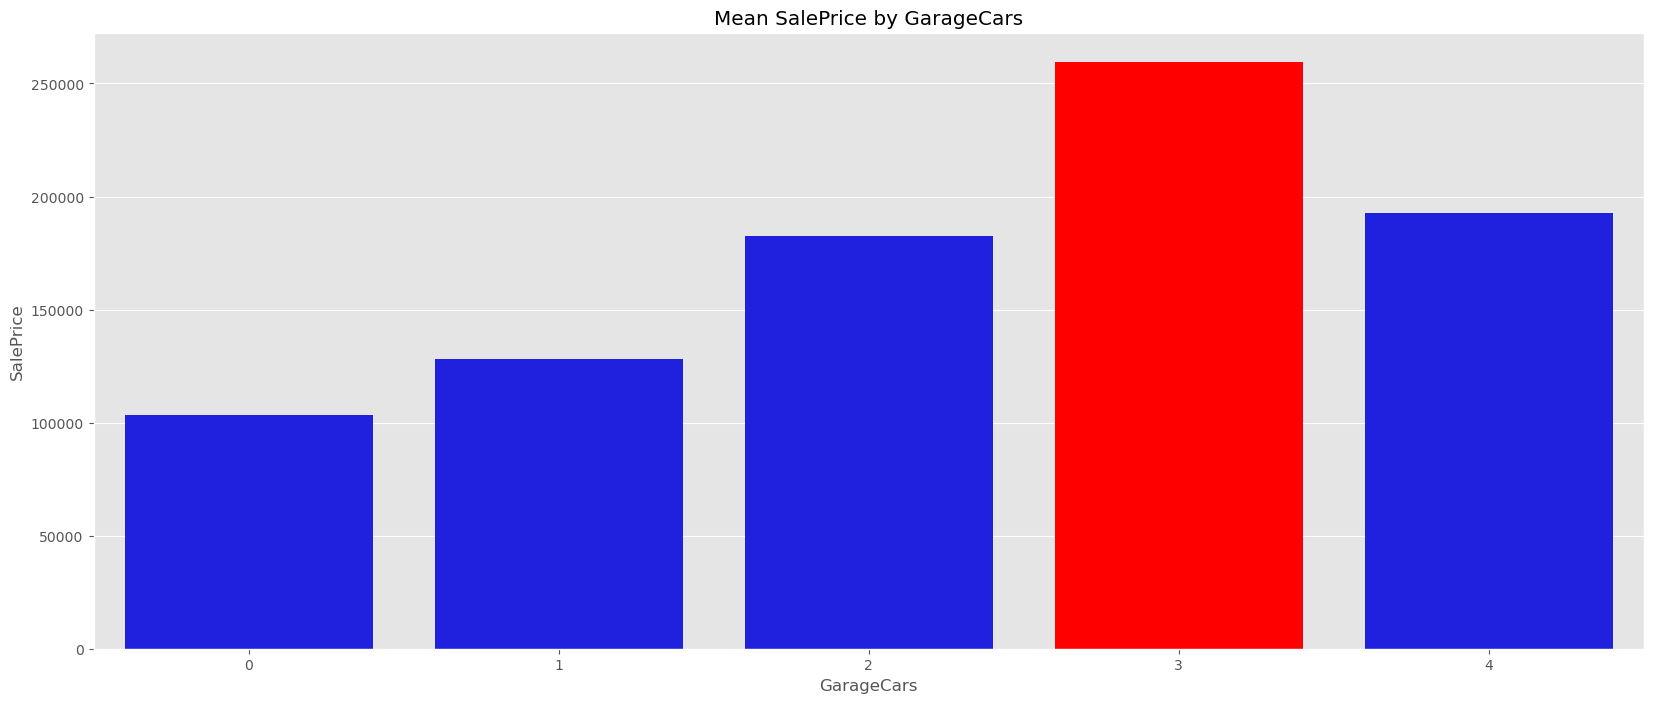

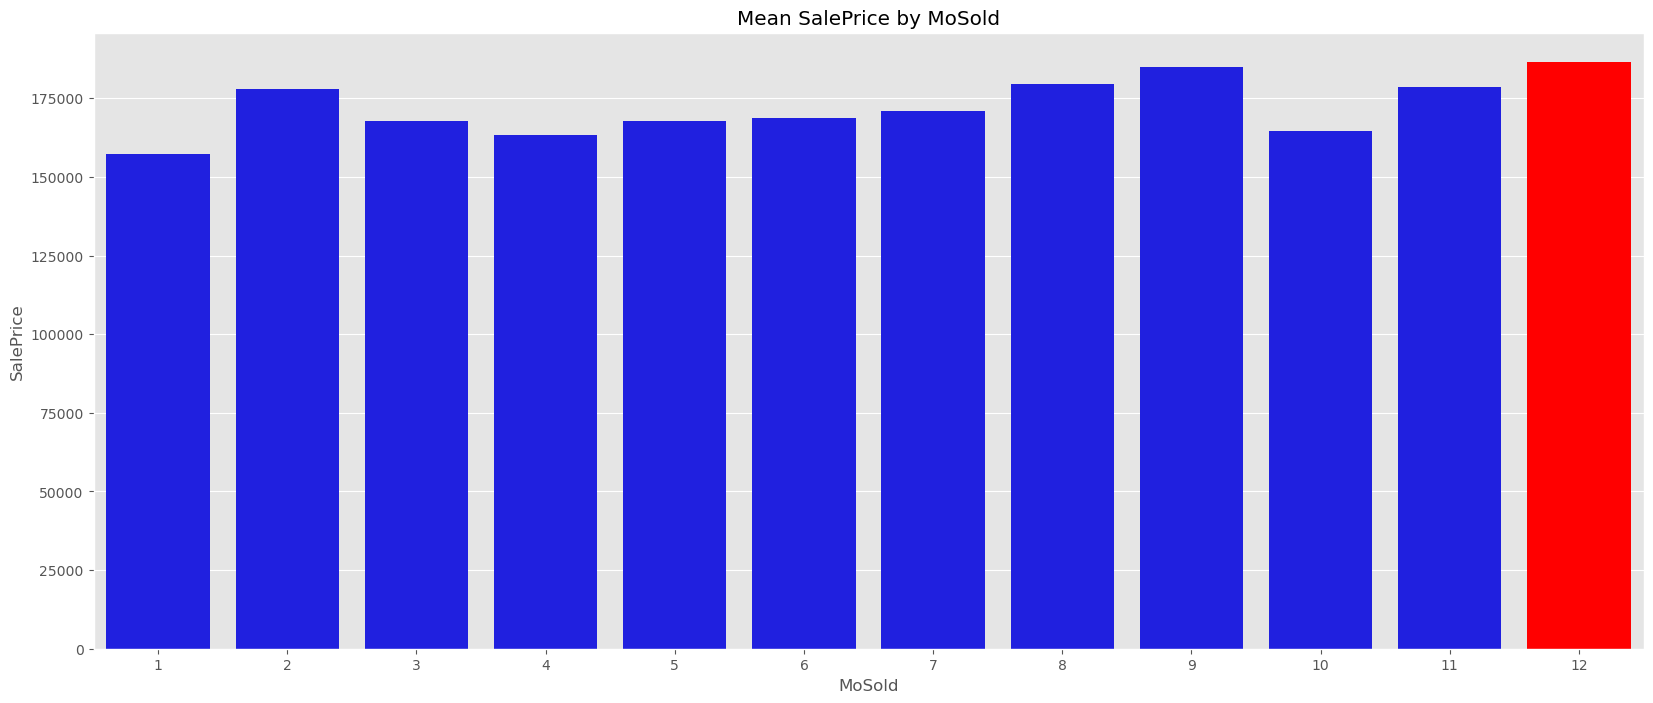

<Figure size 640x480 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt

ap = ["OverallQual", "YearBuilt", "GarageCars", "MoSold"]

plt.figure(figsize=(10, 6))

for column in ap:
    plot_mean_saleprice(column)

plt.tight_layout()
plt.show()


# Mean SalePrice by Time Series Data

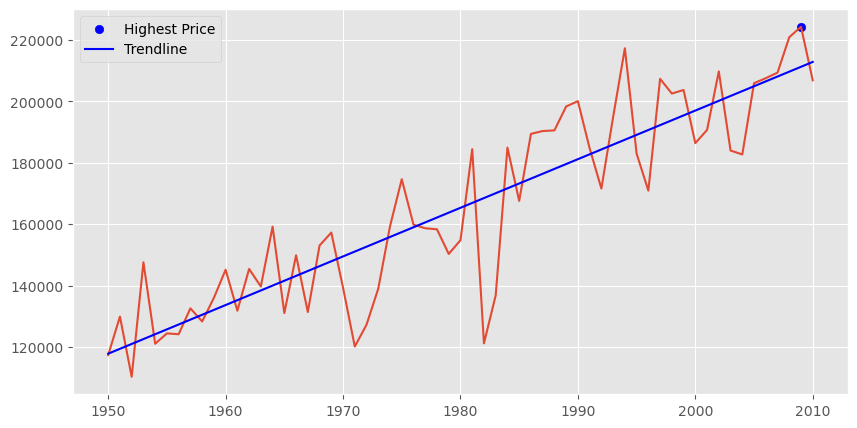

In [24]:
import numpy as np

pt = train.groupby("YearRemodAdd").agg({"SalePrice": "mean"})
max_price = pt["SalePrice"].max()
max_year = pt.loc[pt["SalePrice"] == max_price].index[0]

# Calcular la línea de tendencia
coefficients = np.polyfit(pt.index, pt["SalePrice"], 1)
trendline = np.polyval(coefficients, pt.index)

plt.figure(figsize=(10, 5))
plt.plot(pt.index, pt["SalePrice"])
plt.scatter(max_year, max_price, color="blue", label="Highest Price")
plt.plot(pt.index, trendline, color="blue", label="Trendline")
plt.legend()



In [25]:
import statsmodels.api as sm

def plot_with_autocorrelation(column):
    # Gráfico de promedio de venta por año
    pt = train.groupby(column).agg({"SalePrice": "mean"})
    max_price = pt["SalePrice"].max()
    max_value_index = pt.loc[pt["SalePrice"] == max_price].index[0]


    autocorrelation = sm.tsa.stattools.acf(pt["SalePrice"])
    partial_autocorrelation = sm.tsa.stattools.pacf(pt["SalePrice"])

    # Configurar el tamaño y diseño de los subplots
    fig, axes = plt.subplots(3, figsize=(15, 8))

    axes[0].plot(pt.index, pt["SalePrice"])
    axes[0].scatter(max_value_index, max_price, color="blue", label="Highest Price")
    axes[0].legend()
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Sale Price")
    axes[0].set_title("Average Sale Price by " + column)

    sm.graphics.tsa.plot_acf(pt["SalePrice"], ax=axes[1])
    axes[1].set_xlabel("Lag")
    axes[1].set_ylabel("Autocorrelation")
    axes[1].set_title("Autocorrelation")

    sm.graphics.tsa.plot_pacf(pt["SalePrice"], ax=axes[2])
    axes[2].set_xlabel("Lag")
    axes[2].set_ylabel("Partial Autocorrelation")
    axes[2].set_title("Partial Autocorrelation")

    plt.tight_layout()
    plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


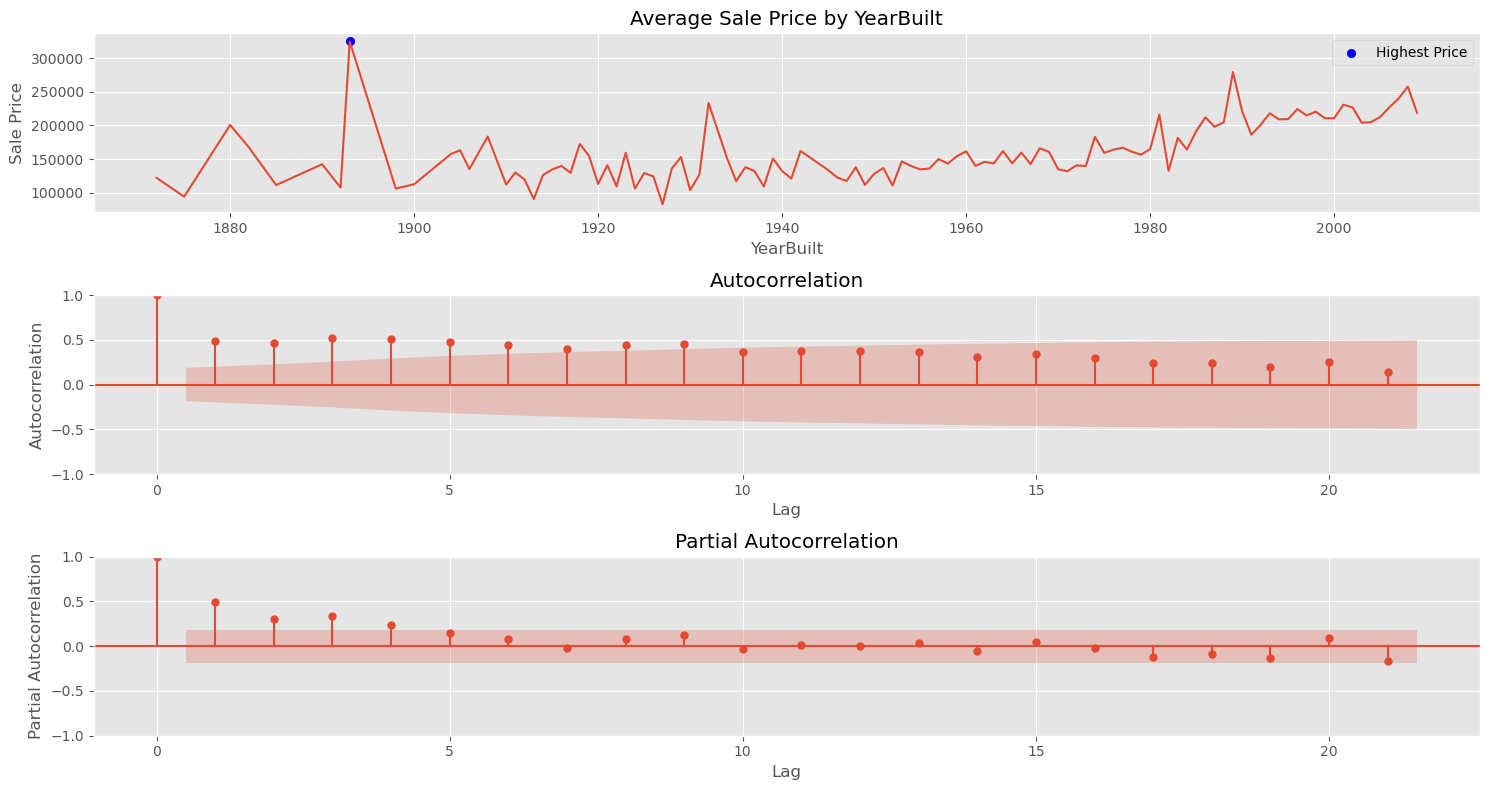

In [26]:
plot_with_autocorrelation("YearBuilt")

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


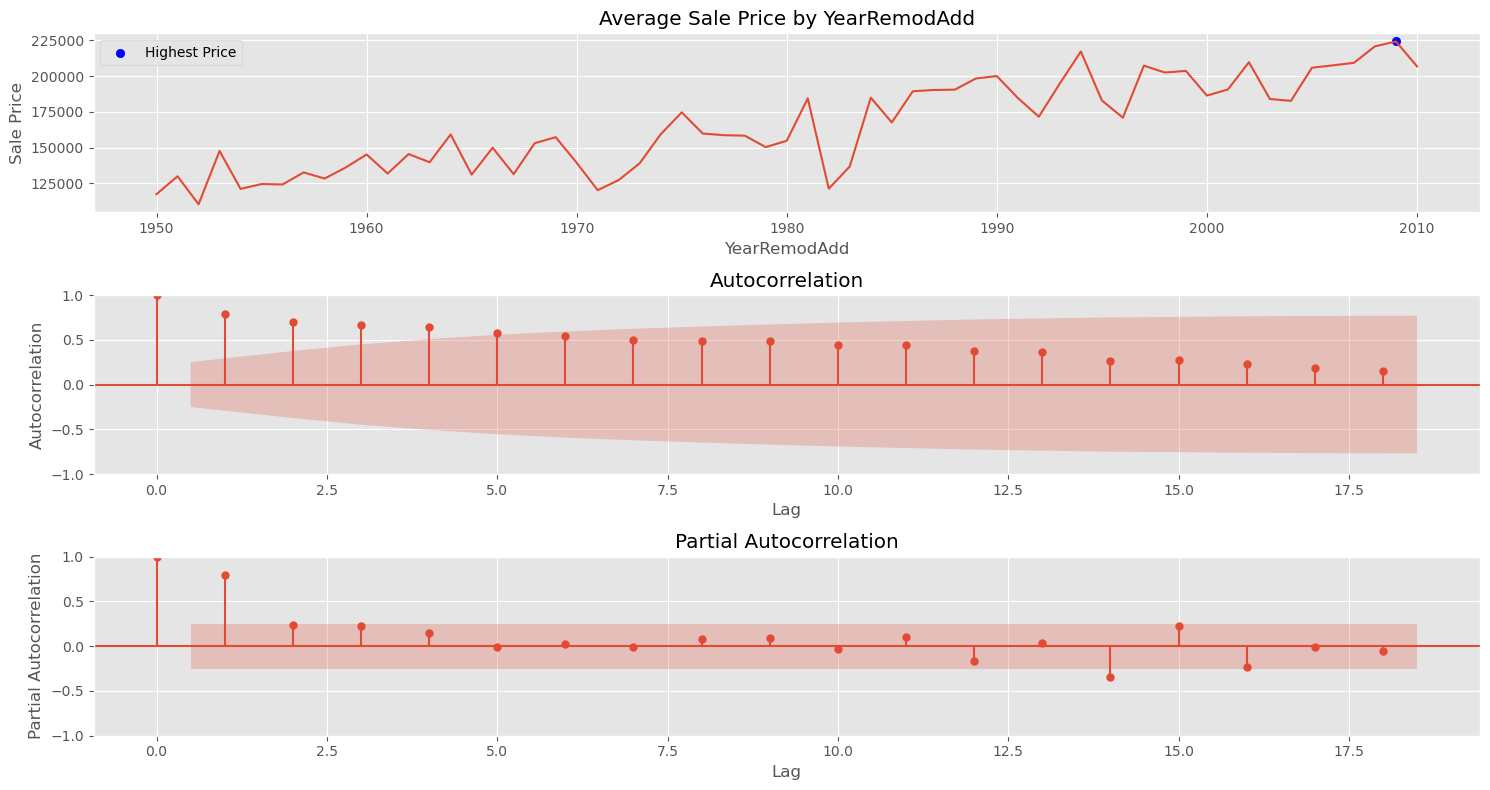

In [27]:
plot_with_autocorrelation("YearRemodAdd")

In [28]:
train["YrSold"].value_counts()

2009    324
2007    315
2006    302
2008    294
2010    169
Name: YrSold, dtype: int64

In [29]:
train["MoSold"].value_counts()

6     244
7     222
5     200
4     137
8     119
3     100
10     83
11     74
9      60
12     59
1      54
2      52
Name: MoSold, dtype: int64

In [30]:
train[["YrSold", "MoSold"]]

,YrSold,MoSold
0,2008,2
1,2007,5
2,2008,9
3,2006,2
4,2008,12
...,...,...
1455,2007,8
1456,2010,2
1457,2010,5
1458,2010,4


In [31]:
SalesXMonth = train.groupby(["YrSold", "MoSold"]).agg({"SalePrice" : "mean"})
SalesXMonth['DateSale'] = pd.to_datetime(SalesXMonth.index.map(lambda x: f'{x[0]}-{x[1]}-01'))
SalesXMonth = SalesXMonth.reset_index(drop=True)


/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


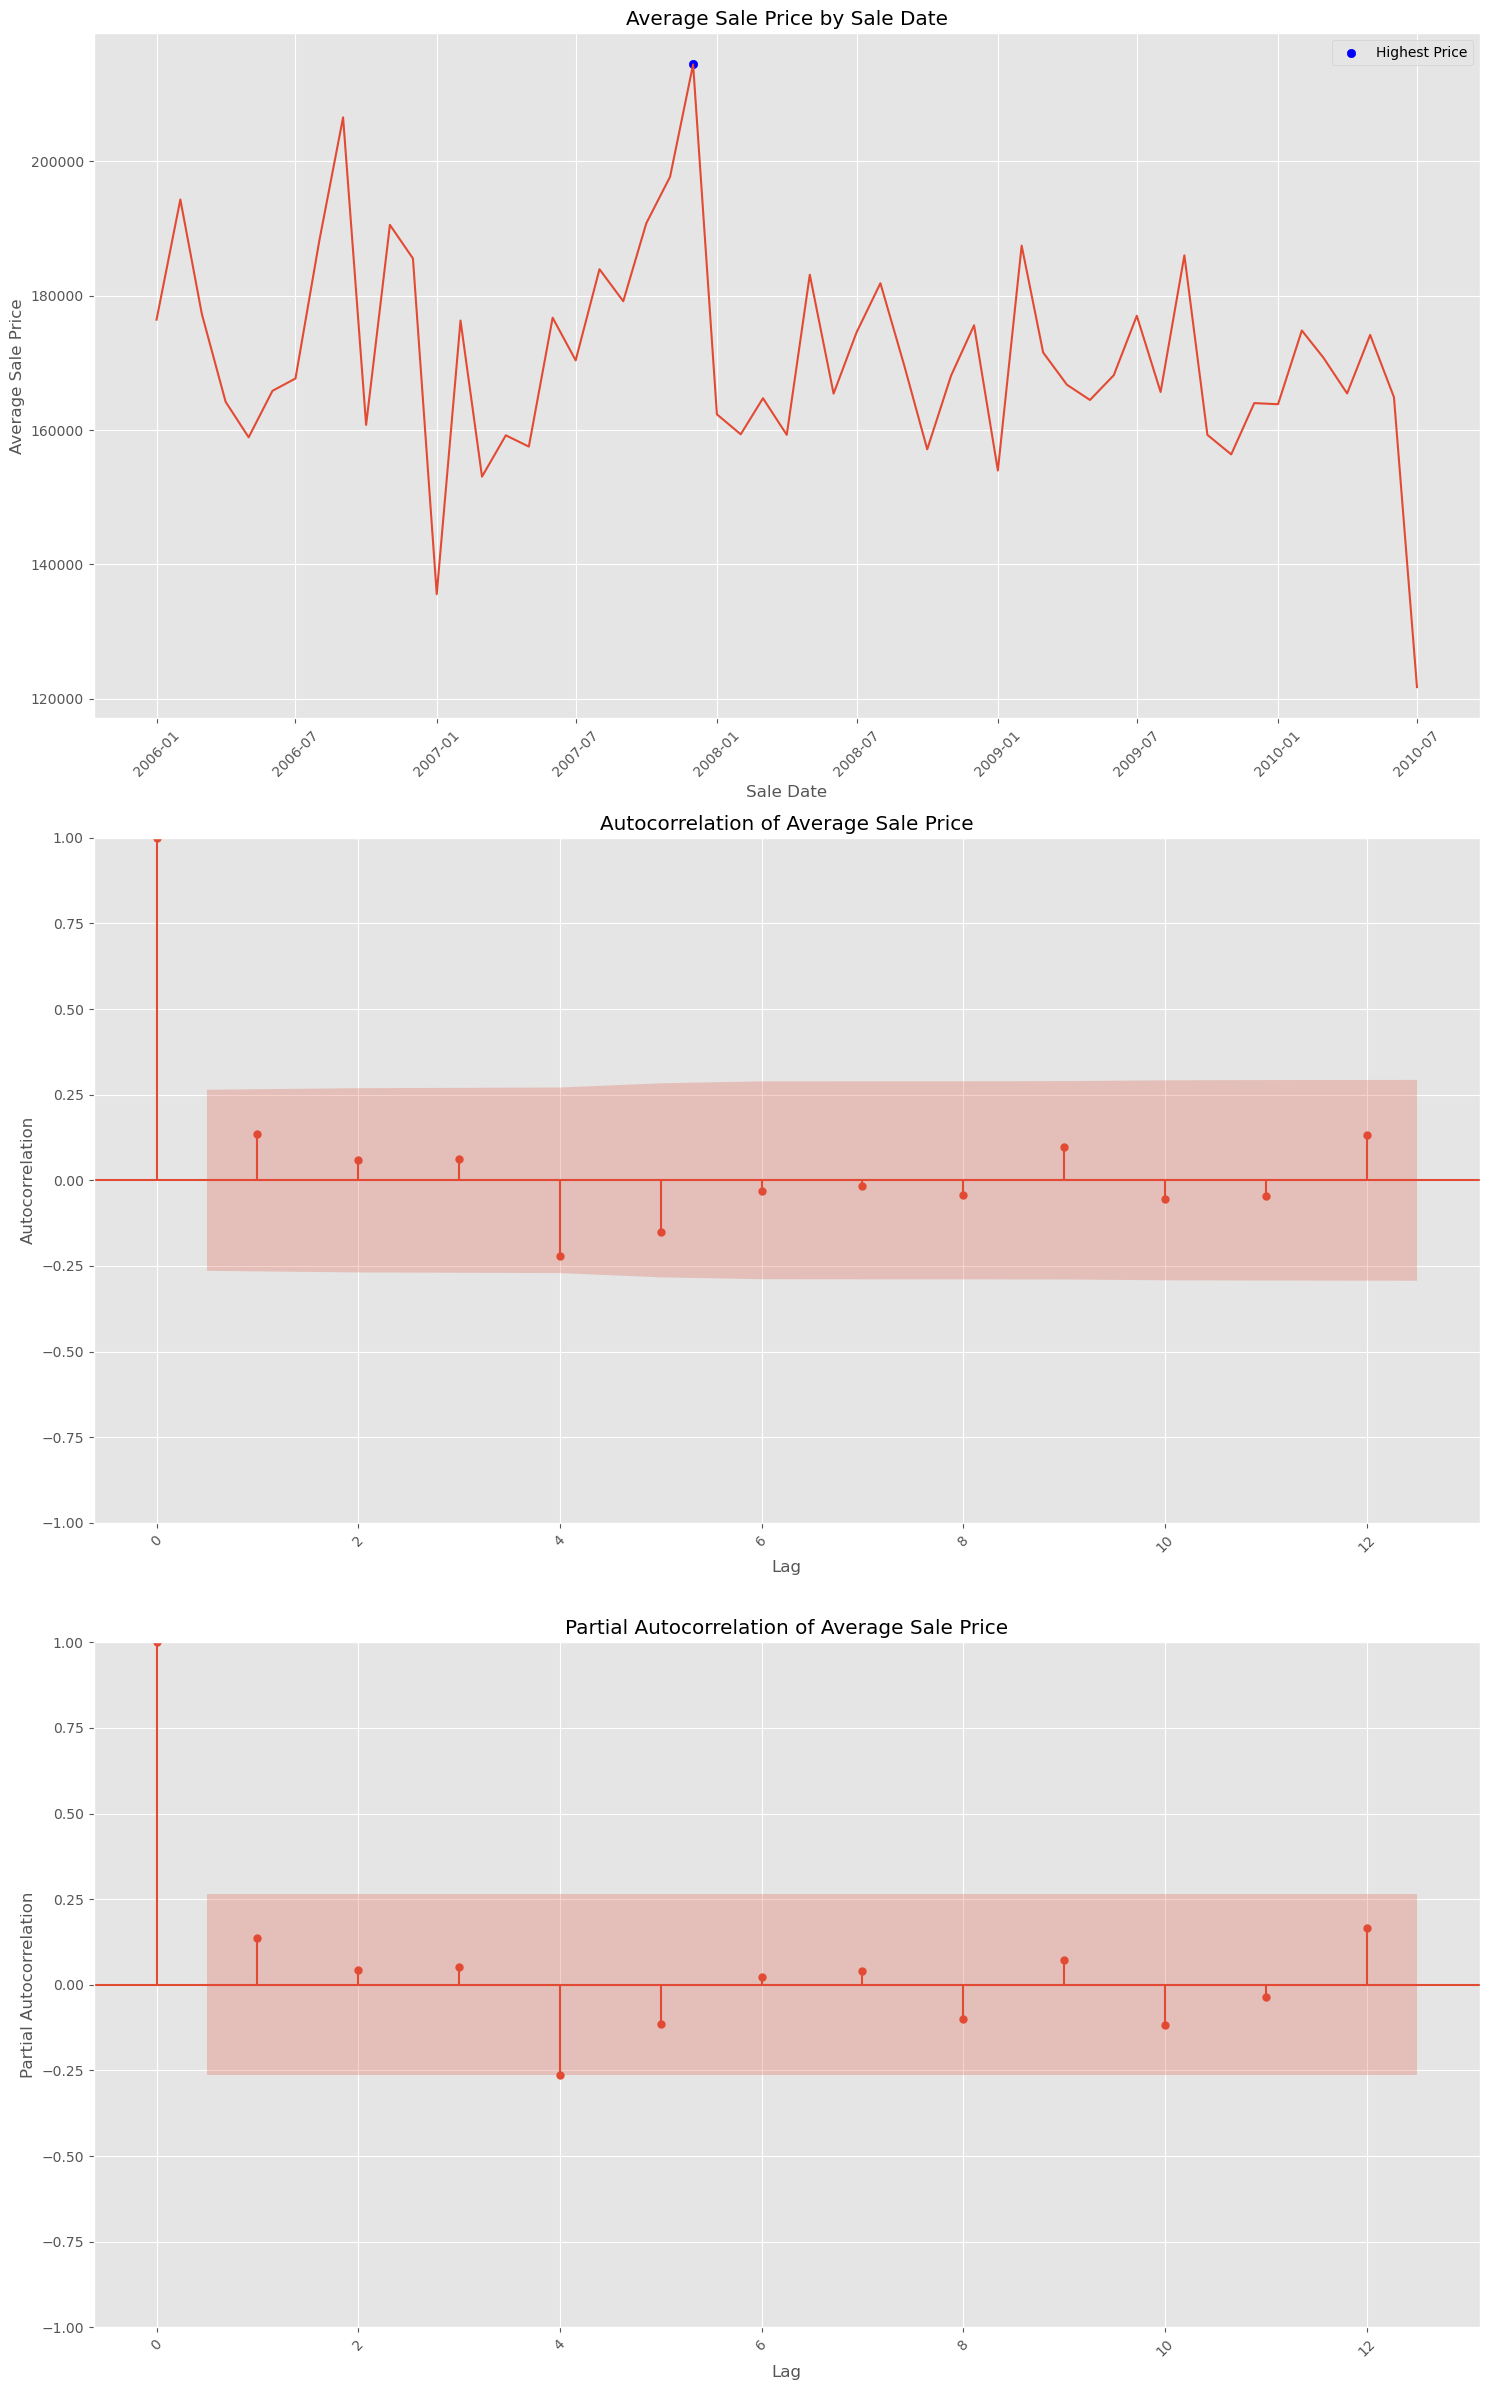

In [32]:
max_index = SalesXMonth['SalePrice'].idxmax()
max_date = SalesXMonth.loc[max_index, 'DateSale']
max_price = SalesXMonth.loc[max_index, 'SalePrice']
fig, axes = plt.subplots(3, 1, figsize=(15, 24))

axes[0].plot(SalesXMonth['DateSale'], SalesXMonth['SalePrice'])
axes[0].scatter(max_date, max_price, color='blue', label='Highest Price')
axes[0].set_xlabel('Sale Date')
axes[0].set_ylabel('Average Sale Price')
axes[0].set_title('Average Sale Price by Sale Date')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

sm.graphics.tsa.plot_acf(SalesXMonth['SalePrice'], lags=12, ax=axes[1])
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Autocorrelation')
axes[1].set_title('Autocorrelation of Average Sale Price')
axes[1].tick_params(axis='x', rotation=45)

sm.graphics.tsa.plot_pacf(SalesXMonth['SalePrice'], lags=12, ax=axes[2])
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Partial Autocorrelation')
axes[2].set_title('Partial Autocorrelation of Average Sale Price')
axes[2].tick_params(axis='x', rotation=45)

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()



# Feature Engineering

In [33]:
train["GarageVolume"] = train["GarageCars"] * train["GarageArea"]
train["GarageAreaRatio"] = train["GarageArea"] / train["GrLivArea"]

In [34]:
train["ExterQual"].value_counts()


TA    903
Gd    462
Ex     25
Fa     14
Name: ExterQual, dtype: int64

In [35]:
# Reemplazar los valores en la columna "ExterQual"
train.replace({"ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)


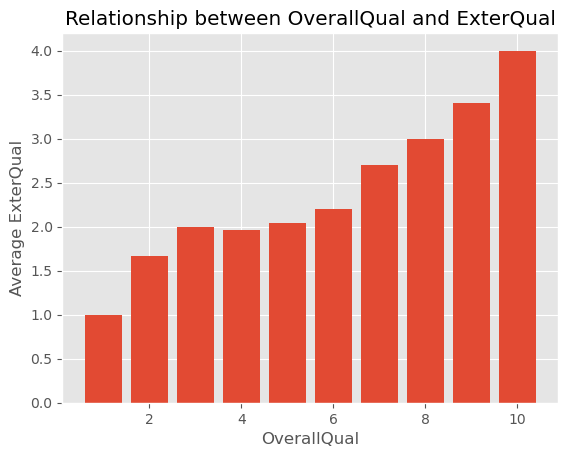

In [36]:
# Agrupar los datos por calidad general de la vivienda (OverallQual) y calcular la calidad promedio del material exterior (ExterQual)
quality_data = train.groupby("OverallQual")["ExterQual"].mean()

# Crear el gráfico de barras
plt.bar(quality_data.index, quality_data.values)
plt.xlabel("OverallQual")
plt.ylabel("Average ExterQual")
plt.title("Relationship between OverallQual and ExterQual")
plt.show()


In [37]:
train["OverallQual"] = train["OverallQual"] / train["OverallQual"].max()

train["ExterQual"] = (train["ExterQual"] - train["ExterQual"].min()) / (train["ExterQual"].max() - train["ExterQual"].min())

train["TotalQuall"] = (train["OverallQual"] + train["ExterQual"]) / 2


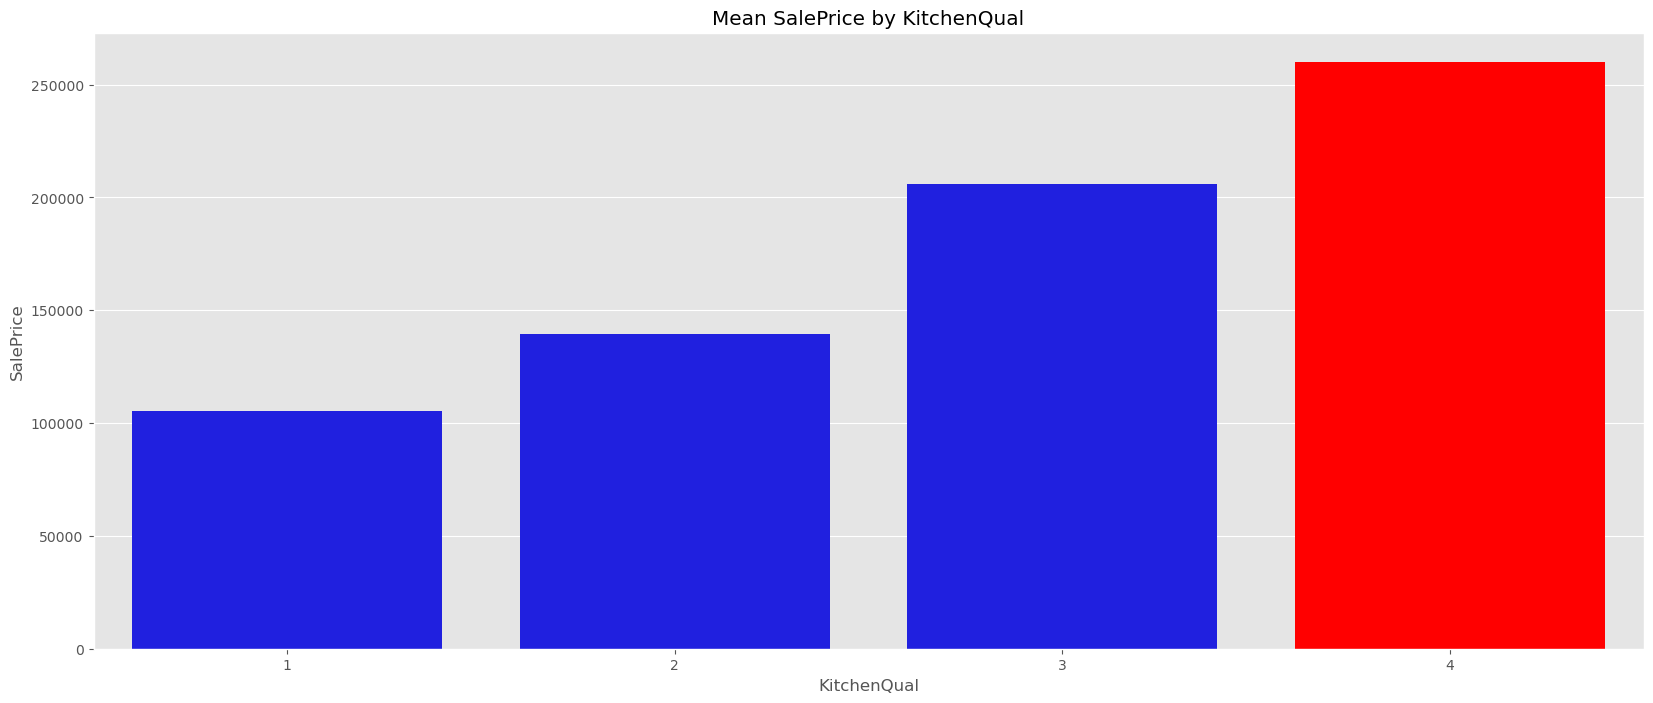

In [38]:
train.replace({"KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)

plot_mean_saleprice("KitchenQual")

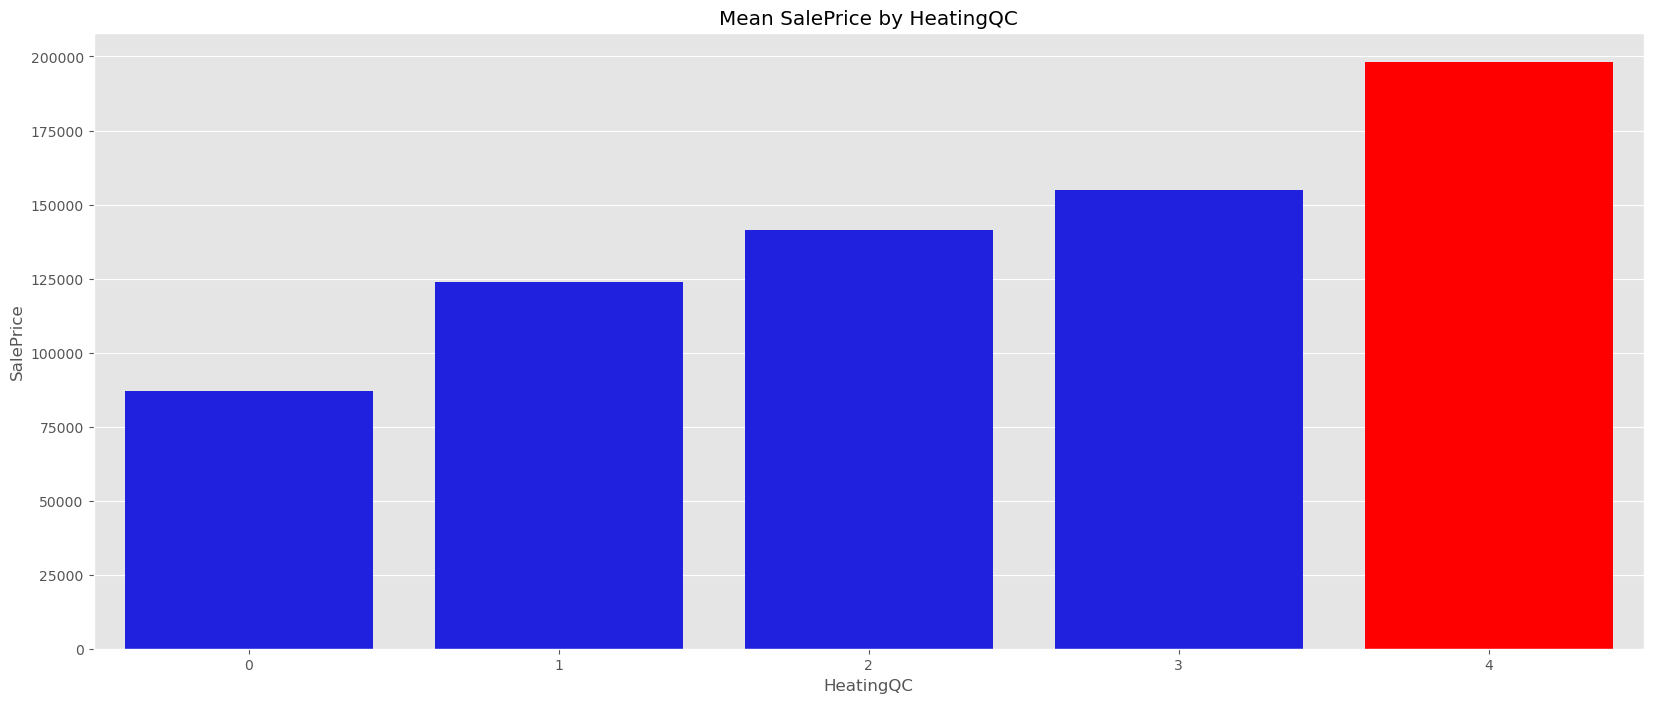

In [39]:
train.replace({"HeatingQC": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)

plot_mean_saleprice("HeatingQC")

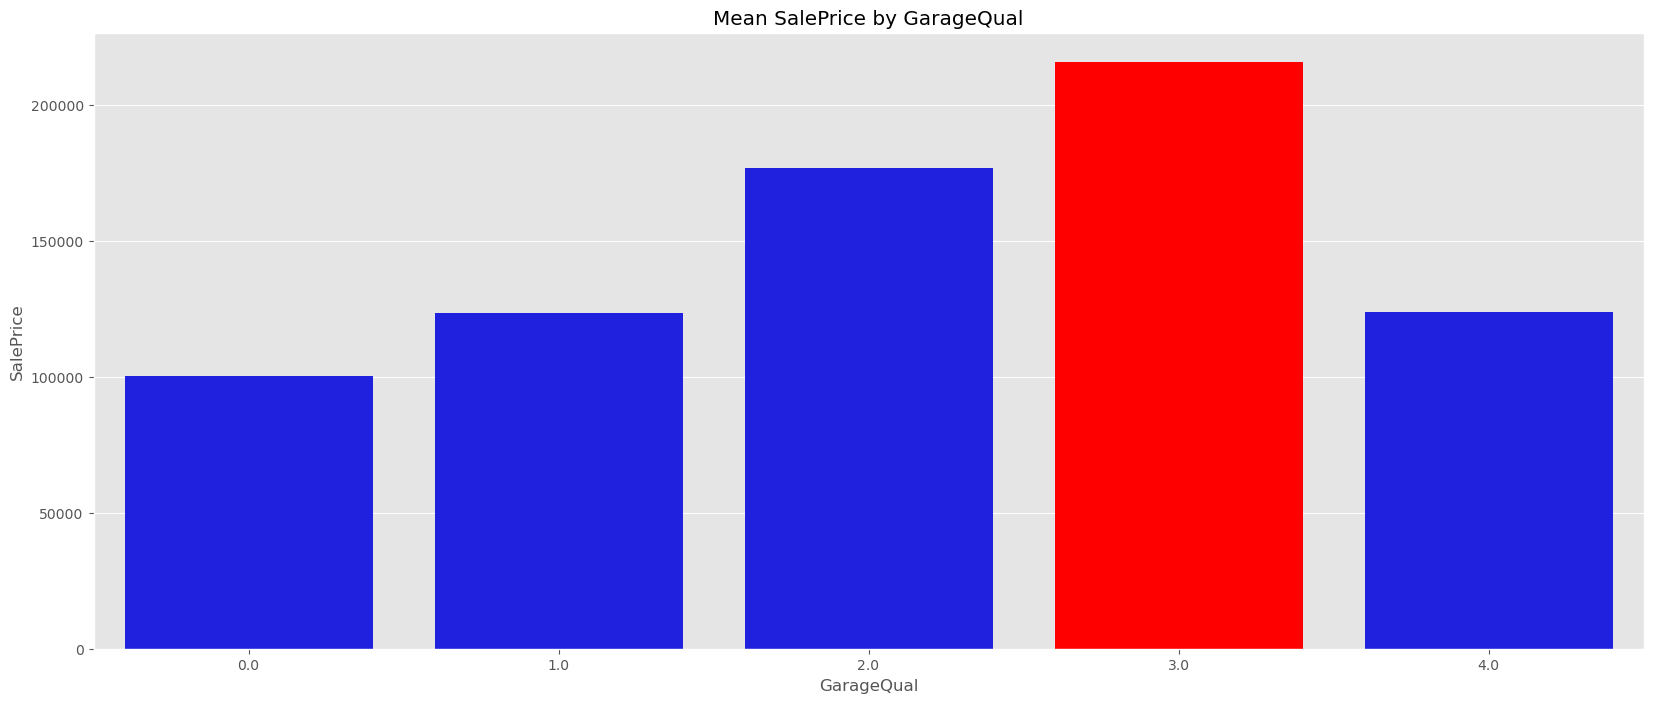

In [40]:
train.replace({"GarageQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)

plot_mean_saleprice("GarageQual")

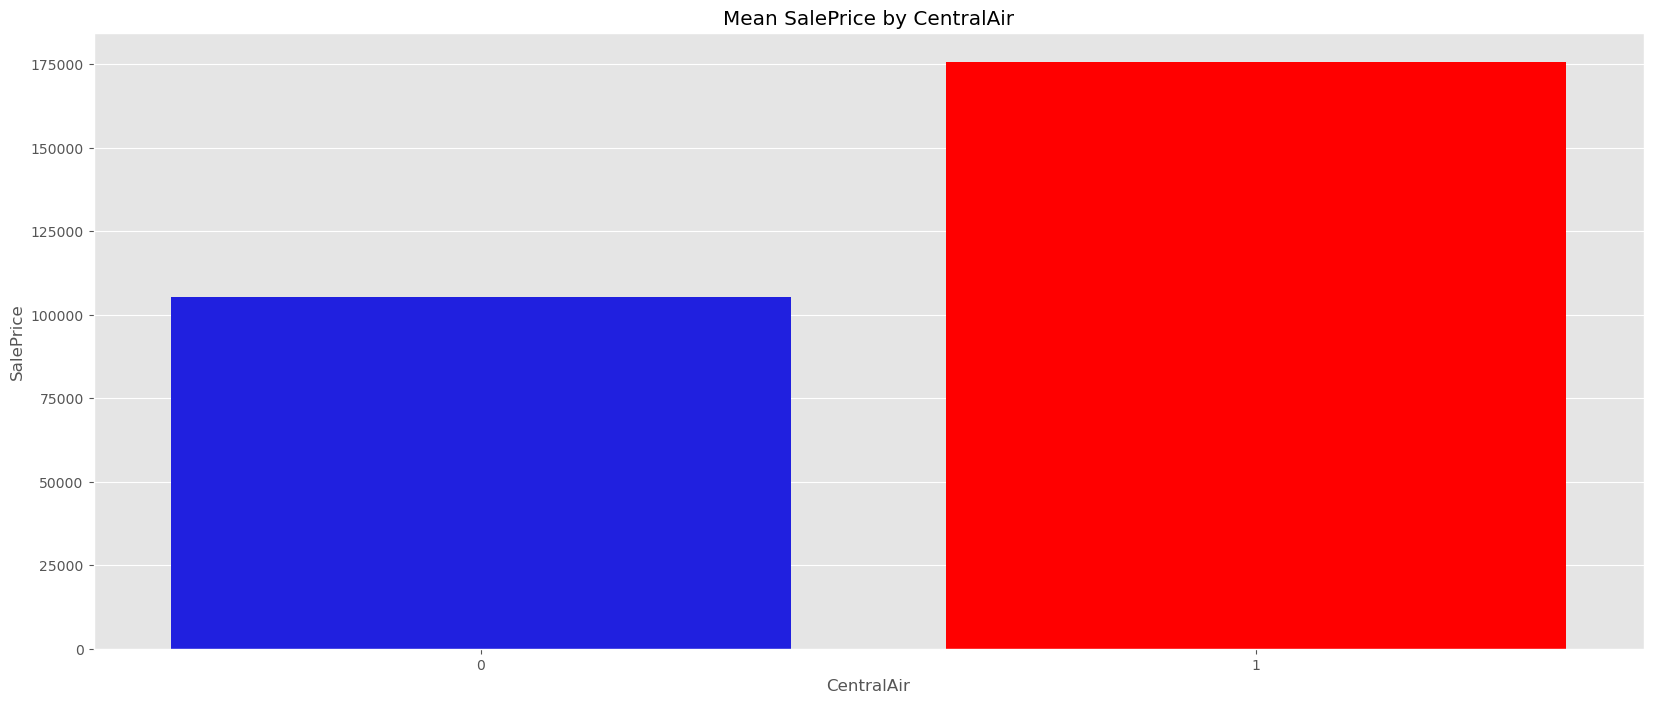

In [41]:
train.replace({"CentralAir": {"Y" : 1, "N" : 0}}, inplace=True)

plot_mean_saleprice("CentralAir")

/tmp/ipykernel_20/300741084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr().nlargest(20, "SalePrice")


<Axes: >

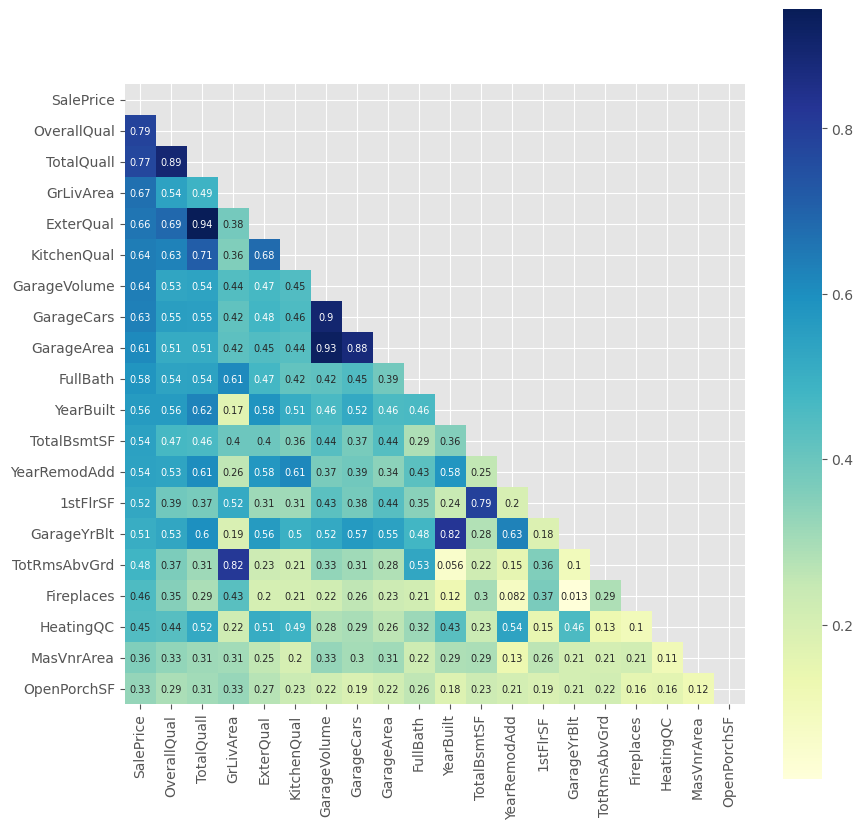

In [42]:
corrmat = train.corr().nlargest(20, "SalePrice")
corrmat = corrmat.T.sort_values("SalePrice", ascending = False)[:20]
mask = np.triu(np.ones_like(corrmat))
plt.figure(figsize = (10, 10))
sns.heatmap(data = corrmat, mask = mask, annot = True, square = True, cmap = "YlGnBu", annot_kws = {"fontsize" : 7})

# Preprocessing

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class Dataset:
    def __init__(self, df, is_train=True):
        self.df = df
        self.is_train = is_train

    def preprocess_data(self):
        processed_df = self.df.copy()
        
        if self.is_train:
            processed_df = processed_df[processed_df["SalePrice"] < 350000]
            processed_df = processed_df[processed_df["GarageArea"]  <= 1000 ]
            processed_df = processed_df[processed_df["TotalBsmtSF"]  <= 3000 ]
            processed_df = processed_df[processed_df["GrLivArea"]  <= 3000 ]
            processed_df = processed_df[processed_df["LotArea"]  <= 50000 ]
        # Apply preprocessing steps
        processed_df = processed_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', "Id"], axis=1)
        processed_df["GarageVolume"] = processed_df["GarageCars"] * processed_df["GarageArea"]
        processed_df["GarageAreaRatio"] = processed_df["GarageArea"] / processed_df["GrLivArea"]
        processed_df.replace({"ExterQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)
        processed_df["OverallQual"] = processed_df["OverallQual"] / processed_df["OverallQual"].max()
        processed_df["ExterQual"] = (processed_df["ExterQual"] - processed_df["ExterQual"].min()) / (processed_df["ExterQual"].max() - processed_df["ExterQual"].min())
        processed_df["TotalQuall"] = (processed_df["OverallQual"] + processed_df["ExterQual"]) / 2
        processed_df.replace({"HeatingQC": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)
        processed_df.replace({"GarageQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1, "Po" : 0}}, inplace=True)
        processed_df.replace({"KitchenQual": {"Ex": 4, "Gd": 3, "TA": 2, "Fa": 1}}, inplace=True)
        processed_df.replace({"CentralAir": {"Y" : 1, "N" : 0}}, inplace=True)

        categorical_cols = processed_df.select_dtypes(include=['object']).columns
        label_encoder = LabelEncoder()
        processed_df[categorical_cols] = processed_df[categorical_cols].apply(label_encoder.fit_transform)
        
        numeric_cols = processed_df.select_dtypes(include=['float64', 'int64']).columns
        imputer = SimpleImputer(strategy='median')
        processed_df[numeric_cols] = imputer.fit_transform(processed_df[numeric_cols])
        
        return processed_df
    def get_train_test_data(self):
        processed_df = self.preprocess_data()

        X = processed_df

        if self.is_train:
            X = X.drop('SalePrice', axis=1)
            y = processed_df['SalePrice']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            return X_train, X_test, y_train, y_test
        else:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)

            return X


In [44]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
dataset_train = Dataset(df_train, is_train=True)
X_train, X_test, y_train, y_test = dataset_train.get_train_test_data()

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (1104, 76)
Dimensiones de X_test: (277, 76)
Dimensiones de y_train: (1104,)
Dimensiones de y_test: (277,)


# XGBoost Regressor

In [45]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [46]:
# Train the XGB model

def xgb_train(X_train,X_test):
    model_params = {
    'objective': 'reg:squarederror',
    'boosting_type': 'gbtree',
    'learning_rate': 0.1,
    'n_estimators': 500,
    'max_depth': 3,
#     'min_child_weight': 1,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
    'verbosity': 0,
    'early_stopping_rounds':100
    }
    xgb_model = XGBRegressor(**model_params)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=0)

    # Predict on the validation set
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model using mean squared error
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error: ", rmse)
    return xgb_model

xgb_model = xgb_train(X_train,X_test)
    

Root Mean Squared Error:  16848.72479357749


In [47]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [48]:
dataset_test = Dataset(df_test, is_train=False)
X_test = dataset_test.get_train_test_data()

print("Dimensiones de X_test:", X_test.shape)


Dimensiones de X_test: (1459, 76)


In [49]:
baseline_test_pred = xgb_model.predict(X_test)

In [50]:
submission['SalePrice'] = pd.Series(baseline_test_pred)

submission.to_csv('submission.csv', index=False)
submission

,Id,SalePrice
0,1461,123647.773438
1,1462,157725.046875
2,1463,178536.062500
3,1464,181973.187500
4,1465,171215.656250
...,...,...
1454,2915,85427.750000
1455,2916,87238.617188
1456,2917,150982.953125
1457,2918,115349.875000
